Recall on training set :  0.9791666666666666
Recall on test set :  0.803030303030303
DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1,
                       splitter='random')
Number of nodes in the last tree is: 1 with ccp_alpha: 0.16718273972032832


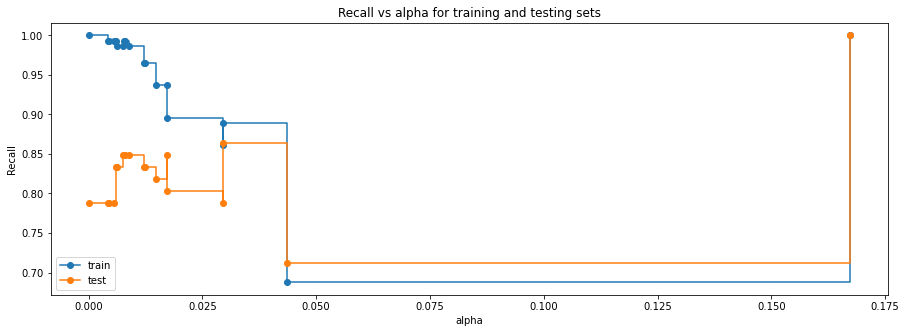

In [50]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

url = "backpain.csv"
BackData = pd.read_csv(url)

BackData.describe()
replacer = {"Status": {"Abnormal": 1, "Normal": 0}}
BackData = BackData.replace(replacer)
X = BackData.drop('Status',axis=1)     # Predictor feature columns (8 X m)
Y = BackData.pop('Status')   # Predicted class (1=True, 0=False) (1 X m)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
dTree = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1, splitter='random')
dTree.fit(x_train, y_train)
pred_train = dTree.predict(x_train)
pred_test = dTree.predict(x_test)
print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

parameters = {"max_depth": [5,10,15, None],
"criterion": ['gini','entropy'],
"splitter": ['best','random']}
acc_scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(dTree, parameters, scoring=acc_scorer,cv=3)
grid_obj = grid_obj.fit(x_train, y_train)
estimator = grid_obj.best_estimator_
print(estimator.fit(x_train, y_train))
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
pd.DataFrame(path)


clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(x_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(x_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()